In [45]:
import pandas as pd
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from os.path import join, expanduser, dirname, basename, exists
import pickle
import matplotlib.animation as animation
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
from animation import animate

constant_dir = expanduser('~/Documents/temp/src/functions/constants/')
meas_dir = expanduser('~/Documents/temp/data/snowschool/station/')
model_dir = expanduser('~/Documents/temp/data/snowschool/modeled/')

with open(join(meas_dir, 'df.pkl'), 'rb') as f:
    meas = pickle.load(f)

with open(join(constant_dir, 'sensor_heights.pkl'), 'rb') as f:
    sensor_heights = pickle.load(f)

with open(join(model_dir, 'temps.pkl'), 'rb') as f:
    model = pickle.load(f)

pd.options.plotting.backend = 'matplotlib'

fig_dir = '/Users/zachkeskinen/Documents/temp/figures/'
anim_dir = '/Users/zachkeskinen/Documents/temp/figures/animations/'

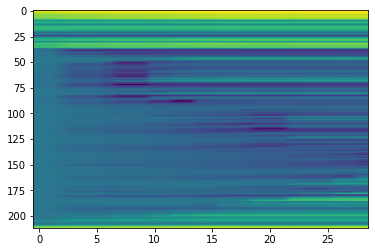

In [15]:
df = meas.resample('D').mean()

/Users/zachkeskinen/miniconda3/envs/snow_temps/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


0
0
50
100
150
200


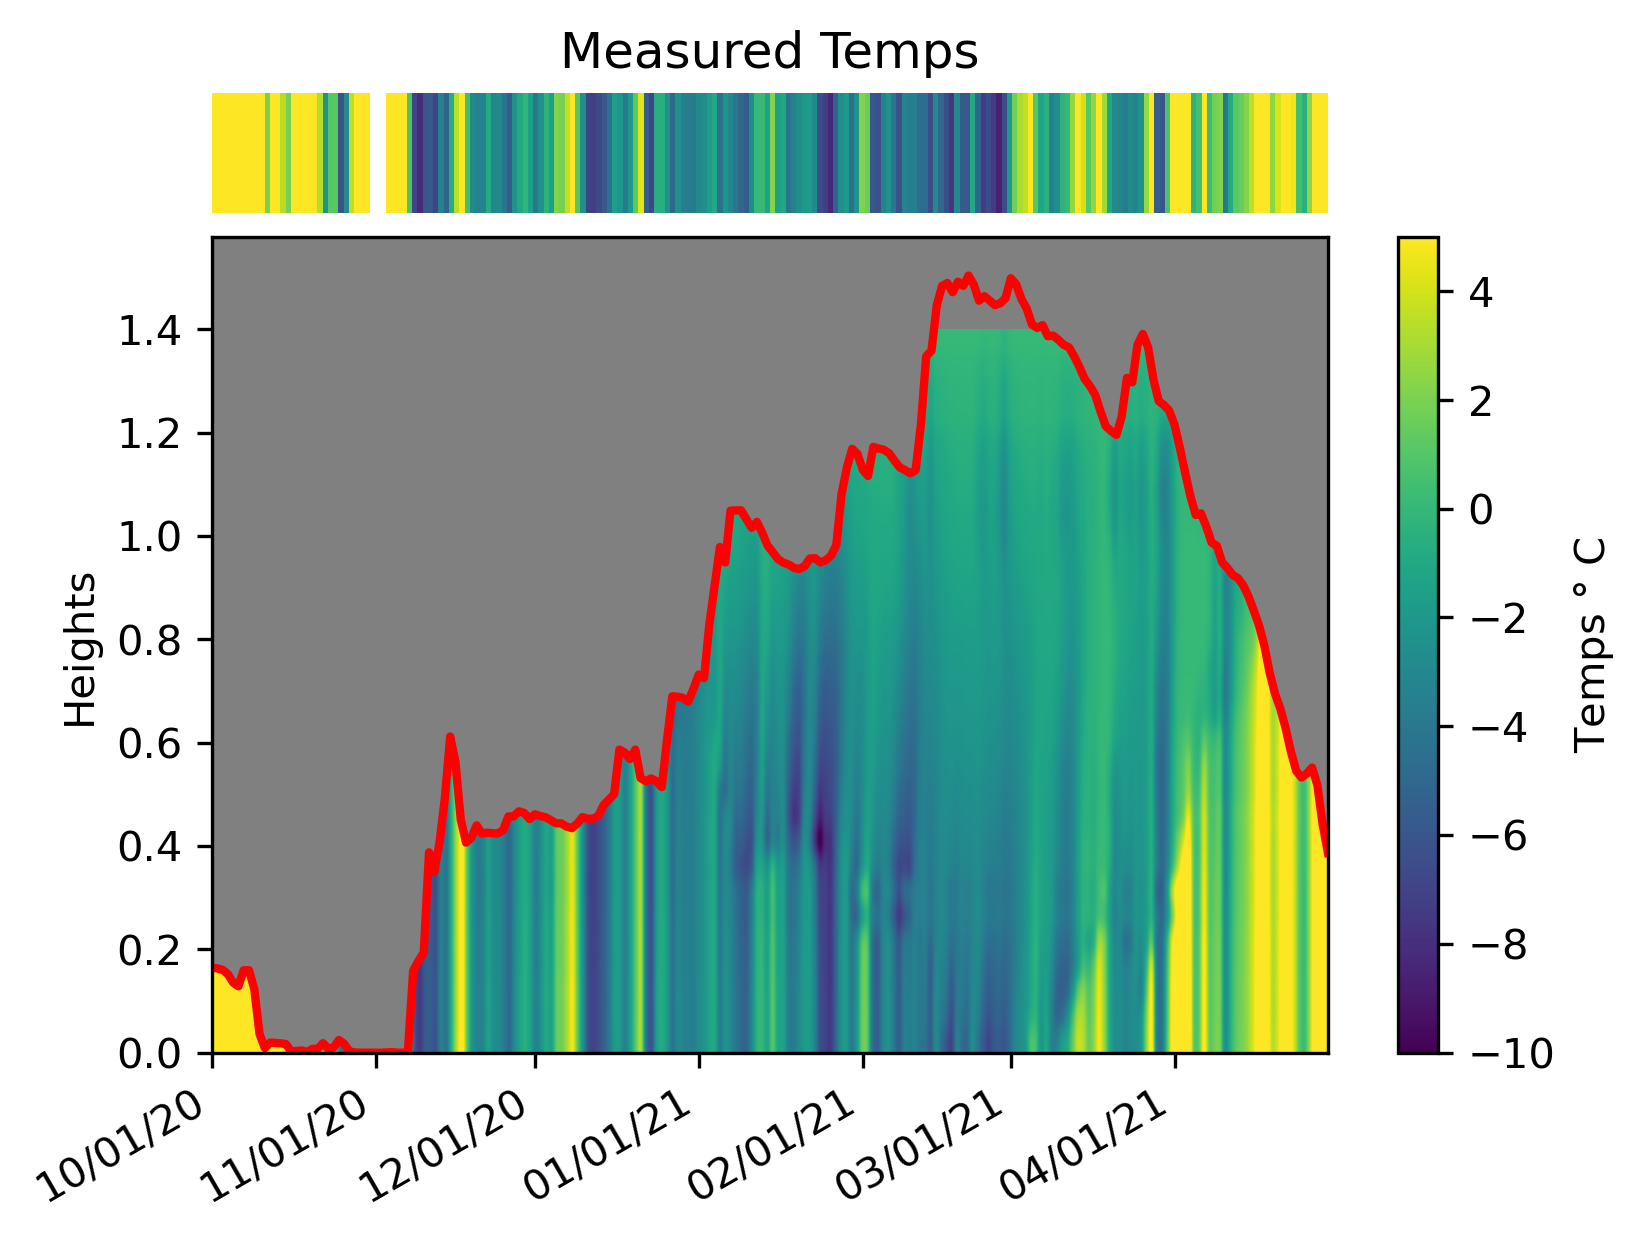

In [9]:
anim = animation.FuncAnimation(plt.figure(dpi = 300), animate, frames=len(df), fargs=(df,),
                              interval=0.3, repeat_delay = 3)
anim.save(join(anim_dir, 'daily_meas.gif'))

In [48]:
df = pd.DataFrame()
df = model.resample('D').mean()
df.loc[:,'air_temp_1'] = meas.resample('D').mean().air_temp_1

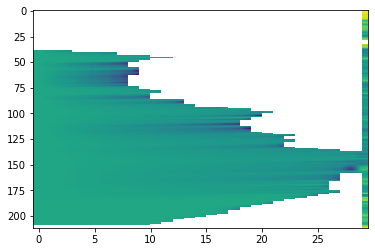

In [55]:
air_temp_cols = [c for c in model.columns if 'air_temp' in c]
plt.imshow(df[air_temp_cols].values, aspect='auto')

0
0
50
100
150
200


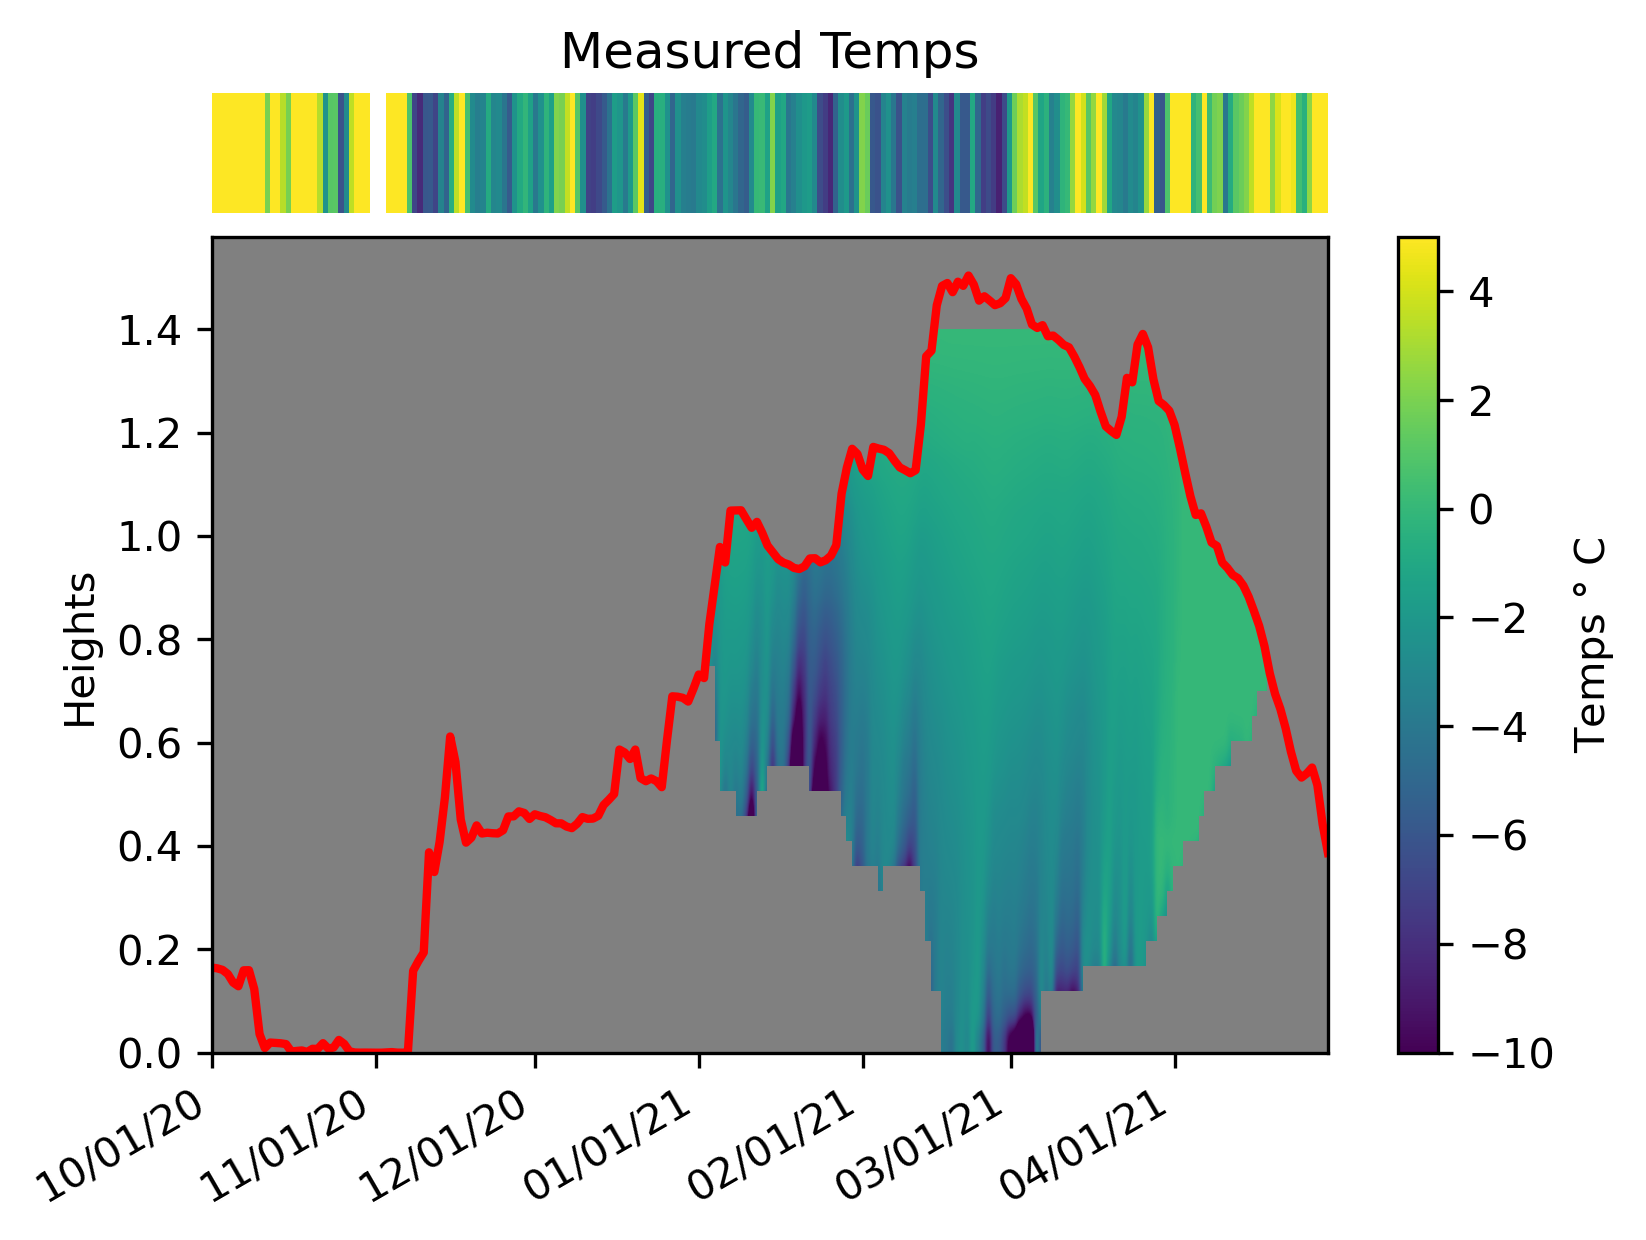

In [50]:
anim = animation.FuncAnimation(plt.figure(dpi = 300), animate, frames=len(df), fargs=(df,),
                              interval=0.3, repeat_delay = 3)
anim.save(join(anim_dir, 'daily_modeled.gif'))